# **Stellar Dataset**

### **Data Description:**
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.


### **Data Content:**
The data consists of observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

### **Data Dictionary:**
- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object) << your target
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS - - - data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

#### Import libraries and read files

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
from sklearn.neighbors import LocalOutlierFactor #Outliar handling

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv("data/stellar.csv")
df.head()

,Unnamed: 0,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,41029,1.237649e+18,194.748212,-0.911226,25.77469,22.72579,20.84263,19.80384,19.29726,756,301,1,527,4.271919e+18,GALAXY,0.525770,3794,55241,926
1,42888,1.237661e+18,140.525977,35.614836,21.94718,21.31617,20.21319,19.45814,19.09832,3560,301,4,221,5.228710e+18,GALAXY,0.439029,4644,55922,111
2,82610,1.237658e+18,125.922894,38.044046,23.47268,21.34390,19.41544,18.67742,18.14655,2822,301,2,135,4.233595e+18,GALAXY,0.414493,3760,55268,770
3,89586,1.237664e+18,18.634831,0.468756,20.03793,18.13051,17.21534,16.80004,16.48915,4263,301,5,240,1.217236e+18,GALAXY,0.091736,1081,52531,503
4,14627,1.237666e+18,52.832458,1.215699,20.72916,20.34843,20.11169,19.75053,19.74247,4849,301,6,807,8.028670e+17,QSO,1.562706,713,52178,365


#### Data Exploring:

In [4]:
# check data structure
df.shape

(80000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   80000 non-null  int64  
 1   obj_ID       80000 non-null  float64
 2   alpha        80000 non-null  float64
 3   delta        80000 non-null  float64
 4   u            80000 non-null  float64
 5   g            80000 non-null  float64
 6   r            80000 non-null  float64
 7   i            80000 non-null  float64
 8   z            80000 non-null  float64
 9   run_ID       80000 non-null  int64  
 10  rerun_ID     80000 non-null  int64  
 11  cam_col      80000 non-null  int64  
 12  field_ID     80000 non-null  int64  
 13  spec_obj_ID  80000 non-null  float64
 14  class        80000 non-null  object 
 15  redshift     80000 non-null  float64
 16  plate        80000 non-null  int64  
 17  MJD          80000 non-null  int64  
 18  fiber_ID     80000 non-null  int64  
dtypes: f

In [23]:
df['fiber_ID'] = df['fiber_ID'].astype(str)
df['spec_obj_ID'] = df['spec_obj_ID'].astype(str)
df['field_ID'] = df['field_ID'].astype(str)
df['run_ID'] = df['run_ID'].astype(str)
df['obj_ID'] = df['obj_ID'].astype(str)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   80000 non-null  int64  
 1   obj_ID       80000 non-null  object 
 2   alpha        80000 non-null  float64
 3   delta        80000 non-null  float64
 4   u            80000 non-null  float64
 5   g            80000 non-null  float64
 6   r            80000 non-null  float64
 7   i            80000 non-null  float64
 8   z            80000 non-null  float64
 9   run_ID       80000 non-null  object 
 10  rerun_ID     80000 non-null  object 
 11  cam_col      80000 non-null  int64  
 12  field_ID     80000 non-null  object 
 13  spec_obj_ID  80000 non-null  object 
 14  class        80000 non-null  object 
 15  redshift     80000 non-null  float64
 16  plate        80000 non-null  int64  
 17  MJD          80000 non-null  int64  
 18  fiber_ID     80000 non-null  object 
dtypes: f

In [16]:
df.fiber_ID.value_counts()

321    132
597    130
333    127
409    126
57     125
      ... 
950     39
904     39
946     38
942     36
906     36
Name: fiber_ID, Length: 1000, dtype: int64

In [17]:
df.spec_obj_ID.value_counts()

4.271918871433468e+18     1
1.208659858554384e+19     1
7.567329511882381e+18     1
8.18656812650752e+17      1
3.3271596455832064e+18    1
                         ..
1.746389558586534e+18     1
6.058668710163667e+18     1
6.123953588056381e+18     1
1.5988386685151089e+18    1
2.819308962183145e+18     1
Name: spec_obj_ID, Length: 80000, dtype: int64

In [18]:
df.field_ID.value_counts()

67     370
65     364
71     360
60     358
61     357
      ... 
980      1
932      1
933      1
752      1
743      1
Name: field_ID, Length: 851, dtype: int64

In [19]:
df.run_ID.value_counts()

3699    1956
3225    1850
4263    1835
2964    1612
7717    1413
        ... 
1869       1
1473       1
1336       1
1896       1
297        1
Name: run_ID, Length: 429, dtype: int64

In [20]:
df.obj_ID.value_counts()

1.237663462606439e+18     12
1.237666301627466e+18     11
1.2376663016312015e+18    11
1.237659326031e+18        11
1.237678802627527e+18     10
                          ..
1.2376672110629356e+18     1
1.2376672110403917e+18     1
1.2376623410911647e+18     1
1.2376648531157322e+18     1
1.2376682949855155e+18     1
Name: obj_ID, Length: 64479, dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isnull().sum().sum()

0

In [5]:
# drop unneccery columns
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [8]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [9]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [10]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.0,80000.000000,80000.00000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.237665e+18,177.700632,24.159518,21.954657,20.503669,19.642753,19.081279,18.640013,4477.351787,301.0,3.513575,186.12925,5.775324e+18,0.575964,5129.408812,55583.907788,448.872725
std,8.436316e+12,96.367204,19.654949,35.501345,35.483238,1.855661,1.759191,35.462257,1964.242282,0.0,1.585732,149.25359,3.321987e+18,0.730784,2950.500767,1807.858750,272.196096
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,10.068540,10.055090,-9999.000000,109.000000,301.0,1.000000,11.00000,2.995191e+17,-0.007352,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.674653,5.123480,20.349987,18.957700,18.127523,17.721440,17.448792,3185.000000,301.0,2.000000,82.00000,2.841817e+18,0.054926,2524.000000,54233.000000,221.000000
50%,1.237663e+18,181.150986,23.737123,22.177485,21.101010,20.125240,19.403975,19.001670,4188.000000,301.0,4.000000,146.00000,5.604746e+18,0.423078,4978.000000,55866.000000,432.000000
75%,1.237668e+18,233.843111,39.944067,23.687197,22.123335,21.043355,20.395833,19.920305,5326.000000,301.0,5.000000,241.00000,8.328330e+18,0.702459,7397.000000,56776.000000,644.000000
max,1.237681e+18,359.999810,83.000519,30.660390,31.602240,29.571860,32.141470,28.790550,8162.000000,301.0,6.000000,989.00000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [11]:
df[df['z'] < 0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
76965,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [6]:
df[df['u'] < 0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
76965,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [7]:
df[df['g'] < 0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
76965,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [8]:
df[df['redshift'] <0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
8,1.237662e+18,241.108347,4.086707,17.48374,16.45801,16.05083,15.98351,15.94460,3910,301,3,206,2.452309e+18,STAR,-7.755727e-04,2178,54629,359
12,1.237679e+18,355.269226,8.907765,20.78420,19.24655,18.60527,18.35803,18.21889,7880,301,1,11,2.959025e+18,STAR,-9.536248e-05,2628,54326,582
32,1.237655e+18,130.390989,44.008272,19.20580,17.90889,17.45420,17.27862,17.23813,2243,301,2,97,7.637070e+18,STAR,-8.501593e-05,6783,56284,331
48,1.237652e+18,143.678531,62.076393,16.92844,15.74427,15.34469,15.22031,15.19253,1412,301,5,49,2.705636e+18,STAR,-1.562739e-04,2403,53795,358
49,1.237670e+18,351.938312,7.505430,18.92135,17.92860,17.54487,17.38401,17.30659,5598,301,4,62,6.942457e+18,STAR,-1.314391e-04,6166,56181,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79951,1.237651e+18,124.520083,51.163157,25.50695,21.76132,20.40987,19.39020,18.89000,1402,301,5,139,4.159227e+18,STAR,-4.093015e-07,3694,55209,555
79967,1.237657e+18,356.862952,-0.003334,18.24349,16.80227,16.22328,16.04497,15.92557,2728,301,3,392,2.141627e+18,STAR,-1.812659e-04,1902,53271,600
79970,1.237661e+18,196.882272,48.636228,20.00693,17.01545,15.80522,15.30979,15.05155,3650,301,2,61,3.646803e+18,STAR,-6.691821e-04,3239,54888,49
79990,1.237654e+18,151.877941,57.246497,21.07416,20.40683,21.20668,21.31547,22.54944,2074,301,2,191,9.217933e+18,STAR,-2.587708e-04,8187,57423,694


In [9]:
df[df['delta'] <0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237649e+18,194.748212,-0.911226,25.77469,22.72579,20.84263,19.80384,19.29726,756,301,1,527,4.271919e+18,GALAXY,0.525770,3794,55241,926
27,1.237671e+18,29.241681,-10.133687,21.51247,19.33824,17.87813,17.32168,16.99102,5933,301,1,78,8.088522e+18,GALAXY,0.297859,7184,56629,208
46,1.237680e+18,357.579089,-6.482391,23.78282,21.43234,20.75867,19.82671,19.26931,8095,301,6,284,8.045853e+18,QSO,0.713437,7146,56573,627
61,1.237664e+18,11.963536,-0.741417,22.47781,22.05056,21.80228,21.42739,21.36848,4263,301,2,195,8.862110e+18,QSO,1.711538,7871,56902,552
68,1.237666e+18,56.733828,-0.495107,22.20108,20.70242,19.68581,19.22490,19.03094,4849,301,2,833,1.302673e+18,GALAXY,0.194871,1157,52643,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79938,1.237679e+18,28.140801,-3.569460,24.56458,22.69478,21.92396,21.89209,21.63348,7881,301,6,210,1.049906e+19,QSO,2.109556,9325,58042,148
79945,1.237649e+18,216.339960,-0.717465,23.48875,23.17914,21.13957,20.09945,19.56122,752,301,2,486,4.538505e+18,QSO,0.838443,4031,55604,9
79962,1.237664e+18,359.896219,-0.697261,17.15635,16.22080,15.98167,15.86882,15.86560,4263,301,2,115,4.746888e+18,STAR,0.000051,4216,55477,340
79967,1.237657e+18,356.862952,-0.003334,18.24349,16.80227,16.22328,16.04497,15.92557,2728,301,3,392,2.141627e+18,STAR,-0.000181,1902,53271,600


In [16]:
#Droping the Raw eith the extreme value
df=df.drop(index=76965)

#### Handling Multicollinearity

In [17]:
#check the corrolation
df.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013622,-0.301228,0.128431,0.149370,0.152707,0.147495,0.140842,1.000000,NaN,-0.048190,0.032078,0.239649,0.065947,0.239648,0.262419,0.067908
alpha,-0.013622,1.000000,0.139969,0.000660,-0.013471,-0.022070,-0.023906,-0.025993,-0.013624,NaN,0.020886,-0.165578,-0.000024,0.000077,-0.000025,0.022505,0.030964
delta,-0.301228,0.139969,1.000000,-0.027358,-0.007951,-0.007356,-0.004700,-0.006609,-0.301230,NaN,0.034855,-0.174791,0.111957,0.032332,0.111957,0.106408,0.030419
u,0.128431,0.000660,-0.027358,1.000000,0.853881,0.729480,0.618381,0.546493,0.128429,NaN,0.007798,-0.012691,0.395578,0.167566,0.395576,0.436296,0.182865
g,0.149370,-0.013471,-0.007951,0.853881,1.000000,0.933156,0.847326,0.775911,0.149368,NaN,0.008135,-0.020739,0.584103,0.319610,0.584102,0.610429,0.221398
r,0.152707,-0.022070,-0.007356,0.729480,0.933156,1.000000,0.963159,0.919479,0.152706,NaN,0.009208,-0.024596,0.653978,0.433481,0.653977,0.669825,0.223976
i,0.147495,-0.023906,-0.004700,0.618381,0.847326,0.963159,1.000000,0.972536,0.147493,NaN,0.007904,-0.024797,0.660871,0.493202,0.660870,0.671739,0.215421
z,0.140842,-0.025993,-0.006609,0.546493,0.775911,0.919479,0.972536,1.000000,0.140840,NaN,0.006918,-0.024825,0.642981,0.501499,0.642980,0.652485,0.204319
run_ID,1.000000,-0.013624,-0.301230,0.128429,0.149368,0.152706,0.147493,0.140840,1.000000,NaN,-0.048290,0.032079,0.239648,0.065947,0.239647,0.262419,0.067895
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


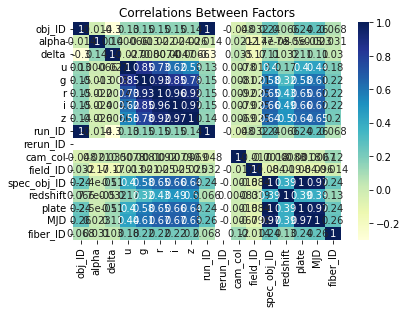

In [18]:
corr_matrix=df.corr()

# Create a Chart for the 6 Factors Correlations
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.title(('Correlations Between Factors'))
sns.set(rc={'figure.figsize':(15,10)})

Text(0.5, 1.0, 'class Vs Redshift for Galaxy')

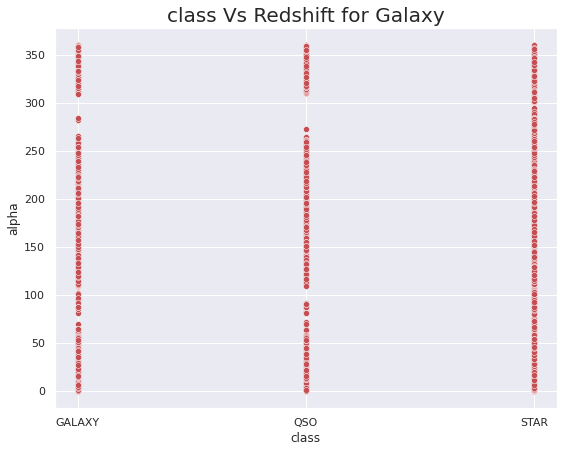

In [26]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='alpha',data=df,color='r')
plt.title("class Vs Redshift for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs Redshift for Galaxy')

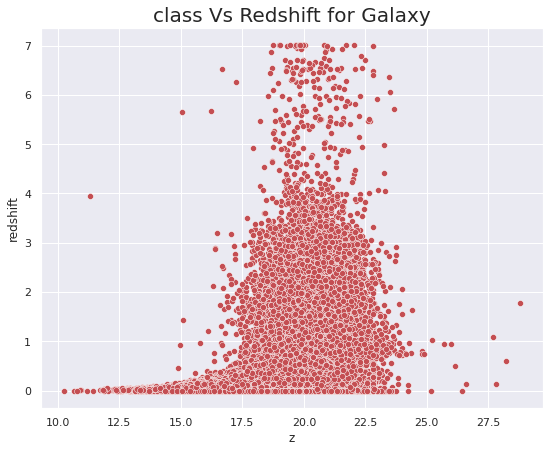

In [27]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='z',y='redshift',data=df,color='r')
plt.title("class Vs Redshift for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs Alfa for Galaxy')

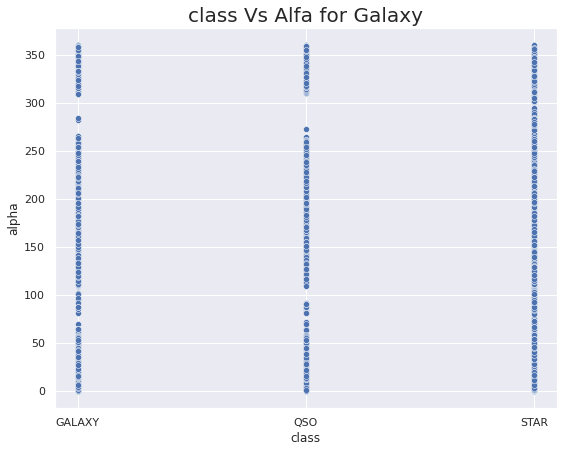

In [28]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='alpha',data=df,color='b')
plt.title("class Vs Alfa for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs Delta for Galaxy')

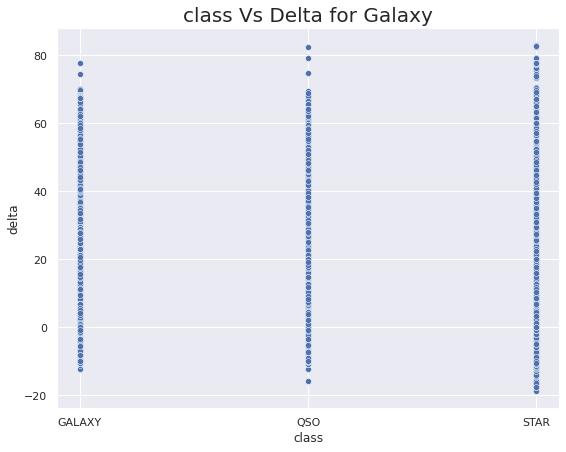

In [29]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='delta',data=df,color='b')
plt.title("class Vs Delta for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs plate for Galaxy')

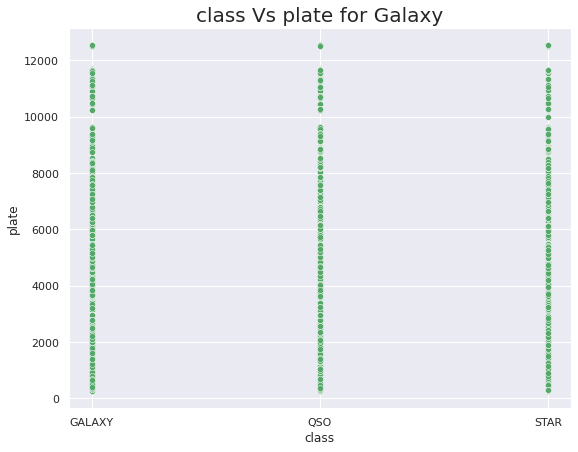

In [30]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='plate',data=df,color='g')
plt.title("class Vs plate for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs MJD for Galaxy')

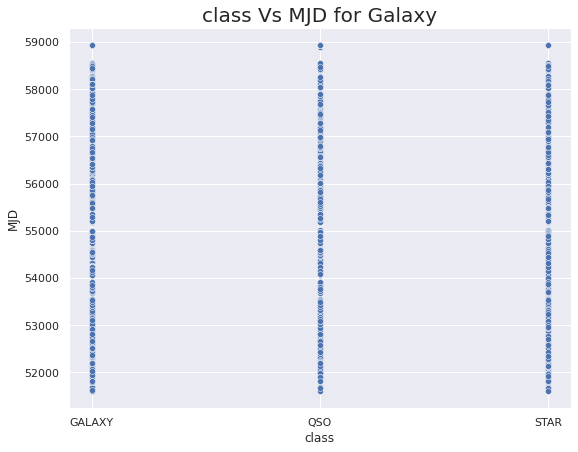

In [31]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='MJD',data=df,color='b')
plt.title("class Vs MJD for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs MJD for Galaxy')

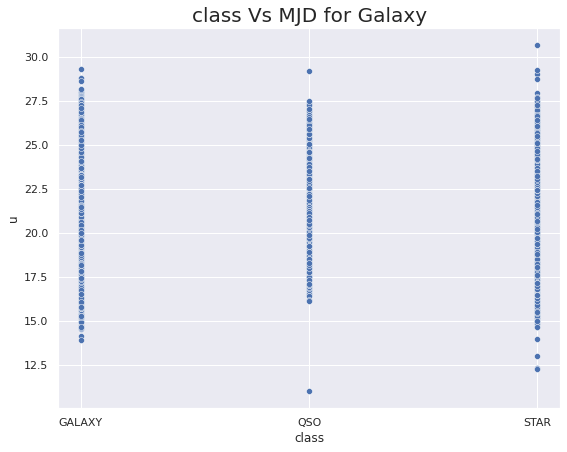

In [32]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='u',data=df,color='b')
plt.title("class Vs MJD for Galaxy",{'fontsize':20})

Text(0.5, 1.0, 'class Vs MJD for Galaxy')

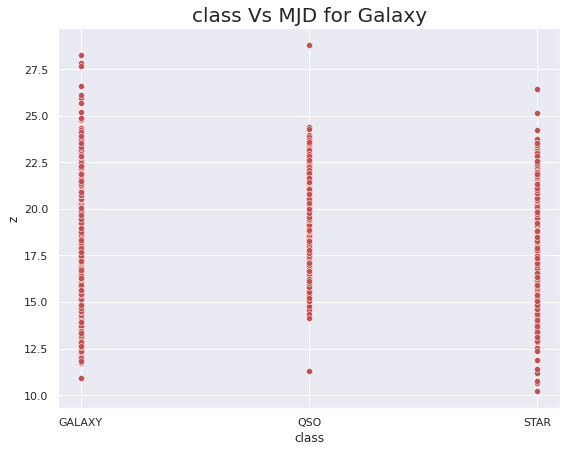

In [33]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='class',y='z',data=df,color='r')
plt.title("class Vs MJD for Galaxy",{'fontsize':20})

In [16]:
df.drop(['alpha', 'delta'], axis=1, inplace=True)

<AxesSubplot:xlabel='class'>

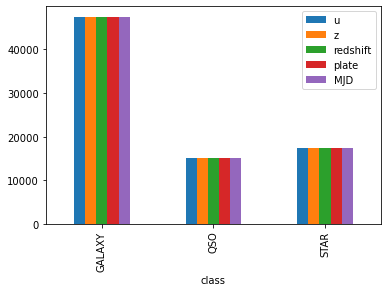

In [17]:
df.info()

### Encoding:

In [18]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]
df["class"].value_counts()

0    47556
1    17275
2    15169
Name: class, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


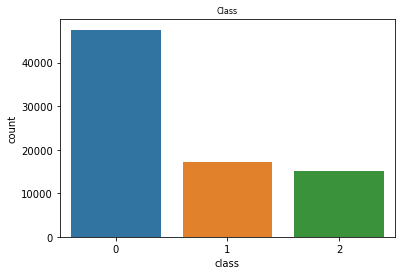

In [19]:
sns.countplot(df["class"])
plt.title("Class",fontsize=8)
plt.show()

In [39]:
df.to_csv('data/Stellar_cleaned.csv')

### Data splitting

#### Simple random sampling

# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state=123)


# dimensions of training data
train.shape


train['id'] = 'train'
test['id'] = 'test'


split = pd.concat([train, test])
split

split['id'].value_counts()